In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, Ridge, LinearRegression, LassoCV, Lasso, LogisticRegression, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold 


In [2]:
df = pd.read_csv('stats.csv')
df.head(n=10)
#split the last_name,first_name column to be two sepearate columns 1 for first name, 1 for last name by first creating a full_name column then splitting
df[['full_name']]= df[['last_name, first_name']]
df[['last_name','first_name']]=df.full_name.str.split(', ',expand=True)

#drop the original last_name,first_name columns 
df.drop('last_name, first_name',axis = 1,inplace=True)

print(f'There are {len(df)} observations made on {len(df.columns)} features considered in this dataset. ' +
      f' \n ' +
      f'Those features are: ' +
      f' \n')
    
for column in df.columns:
    print(column)

print(f'\n Feature of interest: on_base_plus_slg')

There are 538 observations made on 25 features considered in this dataset.  
 Those features are:  

player_id
year
pa
hit
single
double
triple
home_run
k_percent
bb_percent
on_base_plus_slg
exit_velocity_avg
sweet_spot_percent
barrel_batted_rate
solidcontact_percent
hard_hit_percent
avg_best_speed
avg_hyper_speed
whiff_percent
swing_percent
groundballs_percent
flyballs_percent
full_name
last_name
first_name

 Feature of interest: on_base_plus_slg


In [3]:
df.drop('last_name',axis=1,inplace=True)
df.drop('full_name',axis=1,inplace=True)
df.drop('first_name',axis=1,inplace=True)
df.drop("player_id", axis=1, inplace=True)

In [4]:
print(f'\n Checking for missing (Na) values: \n ')
print(f'{df.isna().sum()}')
print(f'\n Checking for duplicated values: \n ')
print(f'{df.duplicated().sum()}')


 Checking for missing (Na) values: 
 
year                    0
pa                      0
hit                     0
single                  0
double                  0
triple                  0
home_run                0
k_percent               0
bb_percent              0
on_base_plus_slg        0
exit_velocity_avg       0
sweet_spot_percent      0
barrel_batted_rate      0
solidcontact_percent    0
hard_hit_percent        0
avg_best_speed          0
avg_hyper_speed         0
whiff_percent           0
swing_percent           0
groundballs_percent     0
flyballs_percent        0
dtype: int64

 Checking for duplicated values: 
 
0


In [27]:
# train_df = df[(df['year'] == 2021) | (df['year'] == 2020)]
# val_df = df[df.year==2022]
# test_df = df[df.year==2023]


# model = LinearRegression()

# scaler = StandardScaler()

# features = ['k_percent','exit_velocity_avg','sweet_spot_percent', 'barrel_batted_rate','solidcontact_percent', 'hard_hit_percent', 
#           'avg_best_speed','avg_hyper_speed',
#           'whiff_percent', 'swing_percent',
#           'groundballs_percent', 'flyballs_percent']

# # Train data
# X_train = train_df.loc[:, train_df.columns!="on_base_plus_slg"]
# y_train = train_df["on_base_plus_slg"]
# X_train_scaled = scaler.fit_transform(X_train)  # Scale training data

# model.fit(X_train_scaled, y_train)

# # Validation
# X_val = val_df.loc[:, val_df.columns!="on_base_plus_slg"]
# y_val = val_df["on_base_plus_slg"]
# X_val_scaled = scaler.transform(X_val)  # Scale validation data

# validation_score = model.score(X_val_scaled, y_val)
# print(f"The validation score is {validation_score:.3}")

# # Testing
# X_test = test_df.loc[:, test_df.columns!="on_base_plus_slg"]
# y_test = test_df["on_base_plus_slg"]
# X_test_scaled = scaler.transform(X_test)  # Scale testing data

# # test_score = model.score(X_test_scaled, y_test)
# # print(f"The test score is {test_score:.3}")


# train_predictions = model.predict(X_train_scaled)
# MAE_train = mean_absolute_error(y_train, train_predictions)
# MSE_trian = mean_squared_error(y_train, train_predictions)
# RMSE_train = np.sqrt(MSE_trian)
# print(f"MAE on Training Data: {MAE_train:.6f}")
# print(f"RMSE on Training Data: {RMSE_train:.6f}")



# validation_predictions = model.predict(X_val_scaled)
# MAE_val = mean_absolute_error(y_val, validation_predictions)
# MSE_val = mean_squared_error(y_val, validation_predictions)
# RMSE_val = np.sqrt(MSE_val)
# print(f"MAE on Validation Data: {MAE_val:.6f}")
# print(f"RMSE on Validation Data: {RMSE_val:.6f}")
# X_val_scaled

# Ridge Regression

# Test out Ridge Modeling

In [28]:
alpha_grid = np.logspace(-4, 6, 50)
grid_search = GridSearchCV(estimator=Ridge(), param_grid={'alpha': alpha_grid}, cv=5, scoring='r2', verbose=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[features])
grid_search.fit(X_train_scaled, y_train)

# Extracting best estimator and scoring
best_alpha = grid_search.best_params_['alpha']
print(f"The Ridge score on training set is {grid_search.score(X_train_scaled, y_train):.3}")
print(f"The best alpha is {best_alpha:.3}")

#error metrics on training data 
training_predictions = grid_search.predict(X_train_scaled)
MAE_train = mean_absolute_error(y_train, training_predictions)
MSE_train = mean_squared_error(y_train, training_predictions)
RMSE_train = np.sqrt(MSE_train)
print(f"RMSE on Training Data: {RMSE_train:.6f}")
print(f"MAE on Training Data: {MAE_train:.6f}")

# Scoring on test and validation sets
X_val_scaled = scaler.transform(val_df[features])
print(f"The Ridge score on the validation set is {grid_search.score(X_val_scaled, y_val):.3}")

# Error metrics on validation data
validation_predictions = grid_search.predict(X_val_scaled)
MAE_val = mean_absolute_error(y_val, validation_predictions)
MSE_val = mean_squared_error(y_val, validation_predictions)
RMSE_val = np.sqrt(MSE_val)
print(f"RMSE on Validation Data: {RMSE_val:.6f}")
print(f"MAE on Validation Data: {MAE_val:.6f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
The Ridge score on training set is 0.635
The best alpha is 4.94
RMSE on Training Data: 0.059088
MAE on Training Data: 0.046727
The Ridge score on the validation set is 0.416
RMSE on Validation Data: 0.063589
MAE on Validation Data: 0.052316


In [31]:
###Test Ridge Performance 

X_test_scaled = scaler.transform(test_df[features])
print(f"The Ridge score on the test set is {grid_search.score(X_test_scaled, y_test):.3}")

test_predictions = grid_search.predict(X_test_scaled)

MAE_test = mean_absolute_error(y_test, test_predictions)
MSE_test = mean_squared_error(y_test, test_predictions)
RMSE_test = np.sqrt(MSE_test)


print(f"RMSE on Test Data: {RMSE_test:.6f}")
print(f"MAE on Test Data: {MAE_test:.6f}")
print("MSE on Test Data:", MSE_test)


The Ridge score on the test set is 0.586
RMSE on Test Data: 0.052425
MAE on Test Data: 0.041925
MSE on Test Data: 0.002748349157661836


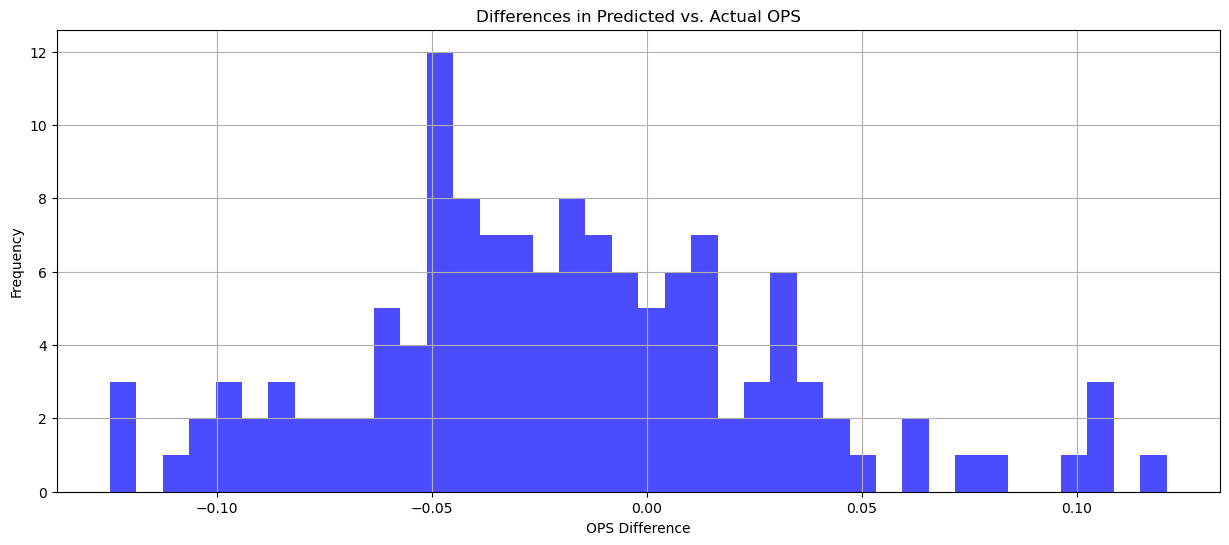

In [32]:
differences = y_test - test_predictions

plt.figure(figsize=(15, 6))
plt.hist(differences, bins=40, alpha=0.7, color='blue')
plt.title('Differences in Predicted vs. Actual OPS')
plt.xlabel('OPS Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

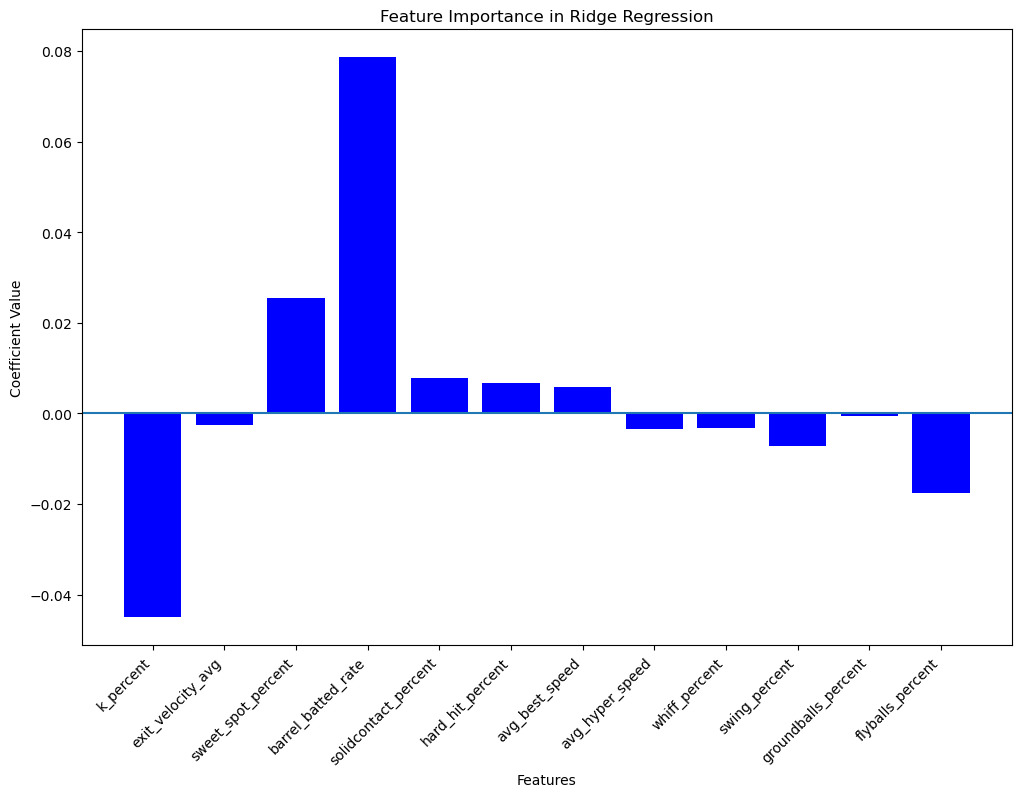

In [33]:
best_ridge = grid_search.best_estimator_

coefficients = best_ridge.coef_

feature_names = features 

# Included features (non-zero coefficients)
included_features = [feature for coef, feature in zip(coefficients, feature_names) if coef != 0]

# Excluded features (zero coefficients)
excluded_features = [feature for coef, feature in zip(coefficients, feature_names) if coef == 0]

plt.figure(figsize=(12, 8))
plt.bar(feature_names, coefficients, color='blue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Ridge Regression')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0)
plt.show()

# Lasso

In [ ]:
X_val

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
features = ['k_percent','exit_velocity_avg','sweet_spot_percent', 'barrel_batted_rate','solidcontact_percent', 'hard_hit_percent', 
          'avg_best_speed','avg_hyper_speed',
          'whiff_percent', 'swing_percent',
          'groundballs_percent', 'flyballs_percent']


alpha_grid = np.logspace(-4, 6, 50)  
#Apply grid search

grid_search = GridSearchCV(estimator=Lasso(), param_grid={'alpha': alpha_grid}, cv=5, scoring='r2', verbose=1)

#Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df[features])
y_train = train_df['on_base_plus_slg']

# Fit grid search
grid_search.fit(X_train_scaled, y_train)

# Extract the best estimator (Lasso model with the best alpha)
best_alpha = grid_search.best_params_['alpha']


# Scoring the model on the training set
train_score = grid_search.score(X_train_scaled, y_train)
print(f"The Lasso score on training set is {train_score:.3}")
print(f"The best alpha is {best_alpha}")

training_predictions = grid_search.predict(X_train_scaled)  # Use best_lasso directly
MAE_train = mean_absolute_error(y_train, training_predictions)
MSE_train = mean_squared_error(y_train, training_predictions)
RMSE_train = np.sqrt(MSE_train)

print("RMSE_train: %.6f" % (RMSE_train))
print("MAE_train: %.6f" % (MAE_train))
print("MSE_train: %.6f" % (MSE_train))



##VALIDATION


y_val = val_df['on_base_plus_slg']


X_val_scaled = scaler.transform(val_df[features])  # Scale the test set
validation_score = grid_search.score(X_val_scaled, y_val)  # Compute test score
print(f"The Lasso score on the validation set is {validation_score:.3}")

validation_predictions = grid_search.predict(X_val_scaled)  # Use best_lasso directly
MAE_val = mean_absolute_error(y_val, validation_predictions)
MSE_val = mean_squared_error(y_val, validation_predictions)
RMSE_val = np.sqrt(MSE_val)

print("RMSE_val: %.6f" % (RMSE_val))
print("MAE_val: %.6f" % (MAE_val))
print("MSE_val: %.6f" % (MSE_val))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
The Lasso score on training set is 0.634
The best alpha is 0.0010481131341546852
RMSE_train: 0.059091
MAE_train: 0.046518
MSE_train: 0.003492
The Lasso score on the validation set is 0.421
RMSE_val: 0.063316
MAE_val: 0.052077
MSE_val: 0.004009


In [40]:
# Scoring the model on the test set
X_test_scaled = scaler.transform(test_df[features])  # Scale the test set
test_score = grid_search.score(X_test_scaled, y_test)  # Compute test score
print(f"The Lasso score on the test set is {test_score:.3}")



test_predictions = grid_search.predict(X_test_scaled)

MAE_test = mean_absolute_error(y_test, test_predictions)
MSE_test = mean_squared_error(y_test, test_predictions)
RMSE_test = np.sqrt(MSE_test)

print("RMSE on Test Data: %.6f" % (RMSE_test))
print("MAE on Test Data: %.6f" % (MAE_test))
print("MSE on Test Data: %.6f" % (MSE_test))


The Lasso score on the test set is 0.594
RMSE on Test Data: 0.051917
MAE on Test Data: 0.041456
MSE on Test Data: 0.002695


In [ ]:
differences = y_test - test_predictions

plt.figure(figsize=(15, 6))
plt.hist(differences, bins=40, alpha=0.7, color='blue')
plt.title('Differences in Predicted vs. Actual OPS')
plt.xlabel('OPS Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
best_lasso = grid_search.best_estimator_

coefficients = best_lasso.coef_

feature_names = features 

# Included features (non-zero coefficients)
included_features = [feature for coef, feature in zip(coefficients, feature_names) if coef != 0]

# Excluded features (zero coefficients)
excluded_features = [feature for coef, feature in zip(coefficients, feature_names) if coef == 0]

plt.figure(figsize=(12, 8))
plt.bar(feature_names, coefficients, color='blue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Lasso Regression')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=0)
plt.show()

# Decision Tree Regressor
* Decision tree regression may not be the best method as its score is relatively low

In [ ]:
model= DecisionTreeRegressor()

model.fit(X_train_scaled, y_train)
y_pred=model.predict(X_test_scaled)


from sklearn.metrics import mean_absolute_error

# Assuming y_pred and y_test are your predicted and true labels, respectively
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)



# Gradient Boosting

In [ ]:
X_train = train_df.loc[:, train_df.columns!="on_base_plus_slg"]
X_train= X_train[features]
X_train_scaled= scaler.fit_transform(X_train)

X_test = test_df.loc[:, test_df.columns!="on_base_plus_slg"]
X_test= X_test[features]
X_test_scaled= scaler.transform(X_test)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'max_depth': [1, 3, 5]
}

gb = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

grid_search.fit(X_train_scaled, y_train)

best_gb = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict on the test data
y_pred = best_gb.predict(X_test_scaled)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r_squared = best_gb.score(X_test_scaled, y_test)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

import matplotlib.pyplot as plt

feature_importances = best_gb.feature_importances_


feature_importances